<a href="https://colab.research.google.com/github/Priya-gawhane/LLM-projects/blob/main/AI_image_ge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the following packages and optimizing the dependencies to generate image
Optimizing the intializing the prompt to generate output with the help of the packages.

##Core Packages
### diffusers -
 Hugging Face's library for diffusion models (Stable Diffusion, DALL-E 2 style models, etc.). This is the main package for generating images from text prompts or doing image-to-image transformations.

### transformers -
 Hugging Face's flagship library containing pre-trained transformer models (BERT, GPT, T5, CLIP, etc.). Essential for most modern NLP and multimodal AI tasks.
### accelerate -
 Hugging Face's library for distributed training and inference. It helps run models efficiently across multiple GPUs or with mixed precision.
torch - PyTorch, the deep learning framework that most of these other libraries depend on.
## Optimization Packages
### bitsandbytes -
 Provides 8-bit and 4-bit quantization for neural networks. This dramatically reduces memory usage (often 2-4x less VRAM needed) with minimal quality loss, making it possible to run larger models on consumer GPUs.
### xformers -
 Facebook's library for memory-efficient transformer operations. Provides optimized attention mechanisms that use less memory and run faster, especially important for high-resolution image generation.
## Utility Packages
### scipy -
 Scientific computing library with mathematical functions, optimization, and signal processing tools used by many AI libraries.
### safetensors -
A safer, faster format for storing neural network weights compared to pickle files. More secure and efficient for loading model checkpoints.

In [1]:
!pip install --upgrade diffusers transformers accelerate torch bitsandbytes scipy safetensors xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 575.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28

In [3]:
 pip install torch==2.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
pip install --upgrade torchaudio torchvision fastai

  Using cached torch-2.8.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cusolver_cu12-11.7.3.90-py3-none-manylinux_2_27_x86_64.whl.metadat

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

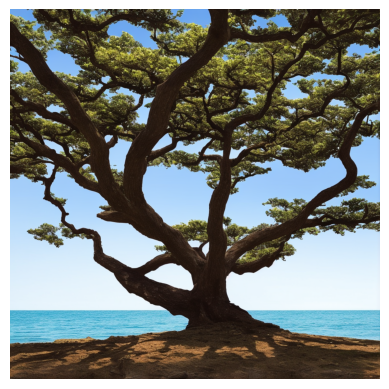

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt

torch.cuda.empty_cache()
model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a tree in front of the ocean"
image = pipe(prompt, width=1000, height=1000).images[0]

plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## Imports

torch: PyTorch for tensor operations and GPU management

StableDiffusionPipeline: The main interface for running Stable Diffusion

DPMSolverMultistepScheduler: A fast, high-quality sampling algorithm

matplotlib: For displaying the generated image

## Memory Management
pythontorch.cuda.empty_cache()
Clears GPU memory cache to free up VRAM before loading the model. This helps prevent out-of-memory errors.

### Model Loading
pythonmodel_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

## Downloads Stable Diffusion 2.1 from Hugging Face Hub
Uses float16 (half precision) to reduce memory usage by ~50% with minimal quality loss
The model is about 5-6GB in size

## Scheduler Replacement

pythonpipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

Replaces the default scheduler (usually PNDM) with DPMSolverMultistepScheduler, which:

Generates higher quality images
Requires fewer inference steps (faster generation)
Is more stable and consistent

## GPU Transfer
pythonpipe = pipe.to("cuda")
Moves the entire pipeline to GPU memory for much faster inference (vs CPU).


Image Generation
pythonprompt = "a tree in front of the ocean"
image = pipe(prompt, width=1000, height=1000).images[0]

Generates a 1000x1000 pixel image from the text prompt
The pipeline returns a list of images; [0] gets the first (and only) image
Default parameters: 50 inference steps, guidance scale of 7.5

##
Display
pythonplt.imshow(image)
plt.axis('off')
plt.show()

Shows the generated image using matplotlib
axis('off') removes coordinate axes for a cleaner display